airbnb ver1
==========

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 5]

## Read train data

In [2]:
raw_train_user = pd.read_csv('./data/train_users_2.csv')
raw_train_user.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [29]:
categorical_cols = [
#     'gender', 
    'signup_method', 
    'language', 
    'affiliate_channel', 
    'affiliate_provider', 
    'first_affiliate_tracked', 
    'signup_app', 
    'first_device_type',
    'first_browser'
]

unused_cols = [
    'date_first_booking',
    'gender'
]

In [31]:
from datetime import  datetime
process_date_func = lambda x: datetime.strptime(x, '%Y-%m-%d')
process_datetime_func = lambda x: datetime.strptime(str(x), '%Y%m%d%H%M%S')
mean_age = raw_train_user[raw_train_user.age < 120].age.mean()
process_age_func = lambda x: 2015 - x if x > 150 else mean_age if x > 100 and x <= 150 else x
def preprocess_data(df):
    # drop unuseful column
    
    processed_df = df.drop(columns=unused_cols)
    processed_df = processed_df.fillna(-1)
    # bad ways to clean data -> dropna
#     processed_df = processed_df.dropna()
    # Process categories data
    processed_df = pd.get_dummies(processed_df, columns=categorical_cols)
    
    # process datetime column
    processed_df['date_account_created'] = processed_df['date_account_created'].apply(process_date_func)
    processed_df['timestamp_first_active'] = processed_df['timestamp_first_active'].apply(process_datetime_func)
    processed_df['dac_year'] = processed_df['date_account_created'].dt.year
    processed_df['dac_month'] = processed_df['date_account_created'].dt.month
    processed_df['dac_day'] = processed_df['date_account_created'].dt.day

    processed_df['tfa_year'] = processed_df['timestamp_first_active'].dt.year
    processed_df['tfa_month'] = processed_df['timestamp_first_active'].dt.month
    processed_df['tfa_day'] = processed_df['timestamp_first_active'].dt.day
    
    # process age
    processed_df['age'] = processed_df['age'].apply(process_age_func
    
    return processed_df
processed_user = preprocess_data(raw_train_user)
processed_user.head()
# processed_user.shape

,id,date_account_created,timestamp_first_active,age,signup_flow,country_destination,signup_method_basic,signup_method_facebook,signup_method_google,language_ca,...,first_browser_TenFourFox,first_browser_TheWorld Browser,first_browser_Yandex.Browser,first_browser_wOSBrowser,dac_year,dac_month,dac_day,tfa_year,tfa_month,tfa_day
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,-1.0,0,NDF,0,1,0,0,...,0,0,0,0,2010,6,28,2009,3,19
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,38.0,0,NDF,0,1,0,0,...,0,0,0,0,2011,5,25,2009,5,23
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,56.0,3,US,1,0,0,0,...,0,0,0,0,2010,9,28,2009,6,9
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,42.0,0,other,0,1,0,0,...,0,0,0,0,2011,12,5,2009,10,31
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,41.0,0,US,1,0,0,0,...,0,0,0,0,2010,9,14,2009,12,8


/home/dks/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


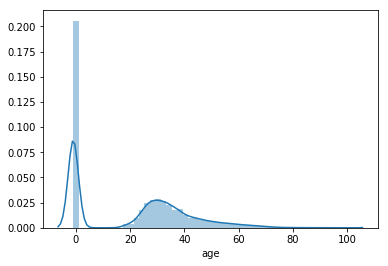

In [40]:
sns.distplot(processed_user.age)

In [41]:
drop_columns = [
    'country_destination', 
    'id',
    'date_account_created',
    'timestamp_first_active'
]

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = processed_user.drop(columns=drop_columns)
y = processed_user.loc[:, 'country_destination']

# Select features
# kbest = SelectKBest(score_func=chi2, k=30)
# X_best = kbest.fit_transform(X, y)

# PCA
# from sklearn.decomposition import PCA
# pca = PCA(iterated_power='auto', n_components=30, random_state=None,
#   svd_solver='arpack', tol=0.0, whiten=False)
# pca.fit(X)
# X_pca = pca.transform(X)
# X_scale = MinMaxScaler().fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import VotingClassifier

def build_model():

    rfc = RandomForestClassifier()
#     model = SVC()
#     xgb = XGBClassifier(n_jobs=8)
    model = XGBClassifier(max_depth=6, learning_rate=0.2, n_estimators=43,
                    objective='multi:softprob', subsample=0.6, colsample_bytree=0.6, seed=0, missing=-1, n_jobs=10)
#     cls = [
#         ('rfc',rfc),
#         ('xgb', xgb)
#     ]
#     # VotingClass
#     model = VotingClassifier(estimators=cls, weights=[1, 2])
    
    return model

In [43]:
airbnb_model = build_model()

In [44]:
airbnb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=-1, n_estimators=43,
       n_jobs=10, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.6)

In [1]:
from sklearn.metrics import classification_report
report = classification_report(y_test, airbnb_model.predict(X_test))
print(report)

NameError: name 'y_test' is not defined

In [15]:
raw_test = pd.read_csv('./data/test_users.csv')

In [16]:
raw_test.date_first_booking.isnull().sum()
raw_test.shape

(62096, 15)

In [177]:
kbest.scores_
kbest.pvalues_
X.columns.values[kbest.get_support()]

array(['signup_flow', 'signup_method_basic', 'signup_method_facebook',
       'language_de', 'language_es', 'language_fr', 'language_it',
       'language_ko', 'language_nl', 'language_pt', 'language_ru',
       'language_zh', 'affiliate_channel_api',
       'affiliate_channel_content', 'affiliate_channel_direct',
       'affiliate_channel_other', 'affiliate_channel_sem-brand',
       'affiliate_channel_sem-non-brand', 'affiliate_provider_craigslist',
       'affiliate_provider_direct', 'affiliate_provider_facebook',
       'affiliate_provider_facebook-open-graph',
       'affiliate_provider_google', 'affiliate_provider_gsp',
       'affiliate_provider_meetup', 'affiliate_provider_other',
       'first_affiliate_tracked_omg',
       'first_affiliate_tracked_tracked-other',
       'first_affiliate_tracked_untracked', 'signup_app_Android',
       'signup_app_Moweb', 'signup_app_Web', 'signup_app_iOS',
       'first_device_type_Android Phone', 'first_device_type_Mac Desktop',
       'firs

In [49]:
y_train.unique()

array(['NDF', 'US', 'NL', 'GB', 'IT', 'DE', 'other', 'ES', 'CA', 'PT',
       'FR', 'AU'], dtype=object)

In [ ]:
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)

In [ ]:
from sklearn.multioutput import ClassifierChain
from sklearn.multiclass import OneVsRestClassifier

estimator = OneVsRestClassifier(RandomForestClassifier(class_weight='balanced', n_estimators=100),
                                n_jobs = 10)

country_clf = ClassifierChain(estimator)


country_clf.fit(X_train, y_train_dummies)
country_prediction = country_clf.predict(X_test)

In [56]:
print(classification_report(y_test_dummies, acountry_prediction))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       150
          1       0.00      0.00      0.00       453
          2       0.02      0.01      0.01       300
          3       0.01      0.01      0.01       704
          4       0.02      0.01      0.01      1529
          5       0.01      0.00      0.01       684
          6       0.02      0.01      0.01       826
          7       0.68      0.71      0.70     37251
          8       0.00      0.00      0.00       222
          9       0.00      0.00      0.00        70
         10       0.42      0.48      0.45     18775
         11       0.07      0.02      0.04      3072

avg / total       0.52      0.56      0.54     64036

